In [9]:
import random

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, uniform

In [10]:
def directed_erdos_renyi(n, p):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if random.random() <= p and i != j:
                A[i, j] = 1
    return A


def get_resistor_matrix(A, dist):
    R = np.zeros_like(A)
    n = A.shape[0]
    for i in range(n):
        for j in range(n):
            if A[i, j] != 0:
                R[i, j] = dist.rvs()
            else:
                R[i, j] = np.inf
    return R


def resistor_to_adjacency_matrix(R, RG):
    S = np.divide(1, RG) + np.divide(1, R).sum(axis=0)
    return np.divide(1, S * R)

In [11]:
n = 100
A = directed_erdos_renyi(n, 0.1)
dist = uniform(-10, 10)  # can change this to any scipy.stats distribution
R = get_resistor_matrix(A, dist)
RG = np.random.uniform(1000, 5000, n)
newA = resistor_to_adjacency_matrix(R, RG)
np.max(np.abs(np.linalg.eig(newA)[0]))

ValueError: Domain error in arguments. The `scale` parameter must be positive for all distributions, and many distributions have restrictions on shape parameters. Please see the `scipy.stats.gamma` documentation for details.

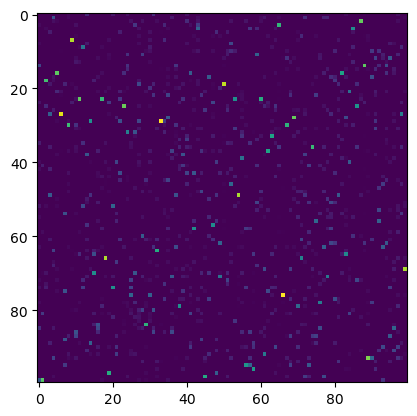

In [ ]:
plt.imshow(newA)